## 공공데이터를 이용한 카페 상권분석(2020 Ver.)


**들어가며**

- 공공데이터를 통해 대한민국을 이해해봅시다(?).
- 공공데이터포털(data.go.kr)에 다양한 데이터가 공개되어 있습니다.
- 그 중에 카페(라는 업종분류)들에 대해서 현황을 조사하려고 합니다.

**명세사항**
1. 전국 카페 데이터를 모두 수집해야합니다.
2. 지역별 or 브랜드별 점포 현황을 확인합니다.
3. 분석 결과를 시각화합니다. 



[데이터] https://www.data.go.kr/data/15012005/fileData.do

In [1]:
# 라이브러리를 불러옵니다.
import pandas as pd

## 1. 데이터 불러오기

In [2]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
temp = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_인천_202012.csv", sep='|',
                  encoding='utf-8')
temp

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17175369,박서방네목로주점,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2818510500107960010163157,NaN,인천광역시 연수구 청량로46번길 7,406131.0,21943.0,NaN,NaN,NaN,126.660078,37.413774
1,27647863,홍가네맛집,NaN,Q,음식,Q09,유흥주점,Q09A04,민속주점,I56219,...,2814010700102950000001592,인천산업용품유통단지,인천광역시 동구 방축로 105,401070.0,22530.0,C,NaN,B31,126.656098,37.484108
2,23498449,츄로하임,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2826010400109750004000001,청라반도유보라,인천광역시 서구 솔빛로 55,404170.0,22765.0,NaN,NaN,102,126.626740,37.525163
3,22882934,간석미용실,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,2820010200101900026021270,NaN,인천광역시 남동구 석촌로14번길 5,405230.0,21545.0,NaN,NaN,NaN,126.709349,37.461969
4,24444979,라헬,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2818510500109230000007532,금호동아아파트,인천광역시 연수구 청능대로 124,406775.0,21967.0,NaN,NaN,106,126.677224,37.410678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118453,17214333,아이지에이,논현점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,2820011000107390001000001,NaN,인천광역시 남동구 앵고개로815번길 19,405300.0,21679.0,NaN,NaN,101,126.723415,37.395174
118454,17214671,땡이네애견용품,NaN,D,소매,D09,애견/애완/동물,D09A02,애완동물 미용실,S96995,...,2820010100111350001005296,청진네오스빌,인천광역시 남동구 예술로 230,405223.0,21557.0,NaN,NaN,531,126.702129,37.454645
118455,17221174,인생건어물,NaN,D,소매,D01,음/식료품소매,D01A11,건어물상,G47213,...,2817710100103310012000001,더스테이프라임월드,인천광역시 미추홀구 인주대로 51,402012.0,22173.0,NaN,NaN,109,126.643929,37.459209
118456,17221206,착한건어물,NaN,D,소매,D01,음/식료품소매,D01A11,건어물상,G47213,...,2818510500109370008149886,NaN,인천광역시 연수구 먼우금로 94,406802.0,21972.0,NaN,NaN,102,126.670416,37.407286


In [3]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
from glob import glob

# csv 목록 불러오기
file_names = glob("data/*.csv")
total = pd.DataFrame()
# 모든 csv 병합하기
for file_name in file_names:
    temp = pd.read_csv(file_name, sep='|', encoding='utf-8')
    total = pd.concat([total, temp])

# reset index
total.reset_index(inplace=True, drop=True)
total

/Users/emphimachine/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17175332,정성밥상,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2635010500105520002023290,NaN,부산광역시 해운대구 해운대로 635-7,612819.0,48087.0,NaN,NaN,NaN,129.159641,35.164474
1,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074.0,48974.0,NaN,NaN,NaN,129.023668,35.100979
2,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020.0,47802.0,NaN,NaN,NaN,129.087156,35.205267
3,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751.0,48305.0,NaN,NaN,20,129.115397,35.143770
4,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813.0,47327.0,NaN,NaN,NaN,129.024938,35.151645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416247,17214333,아이지에이,논현점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,2820011000107390001000001,NaN,인천광역시 남동구 앵고개로815번길 19,405300.0,21679.0,NaN,NaN,101,126.723415,37.395174
2416248,17214671,땡이네애견용품,NaN,D,소매,D09,애견/애완/동물,D09A02,애완동물 미용실,S96995,...,2820010100111350001005296,청진네오스빌,인천광역시 남동구 예술로 230,405223.0,21557.0,NaN,NaN,531,126.702129,37.454645
2416249,17221174,인생건어물,NaN,D,소매,D01,음/식료품소매,D01A11,건어물상,G47213,...,2817710100103310012000001,더스테이프라임월드,인천광역시 미추홀구 인주대로 51,402012.0,22173.0,NaN,NaN,109,126.643929,37.459209
2416250,17221206,착한건어물,NaN,D,소매,D01,음/식료품소매,D01A11,건어물상,G47213,...,2818510500109370008149886,NaN,인천광역시 연수구 먼우금로 94,406802.0,21972.0,NaN,NaN,102,126.670416,37.407286


In [4]:
# 분석에 필요한 column을 고릅니다. ## 자유롭게 하셔도 상관없습니다.
data = total[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명',
             '시군구명', '행정동명']]

data

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,정성밥상,NaN,음식,한식,부산광역시,해운대구,우1동
1,미광장,NaN,숙박,모텔/여관/여인숙,부산광역시,중구,부평동
2,BHC치킨,동래점,음식,닭/오리요리,부산광역시,동래구,복산동
3,스텔라,NaN,소매,의복의류,부산광역시,수영구,남천2동
4,도란도란,NaN,음식,한식,부산광역시,부산진구,개금1동
...,...,...,...,...,...,...,...
2416247,아이지에이,논현점,소매,종합소매점,인천광역시,남동구,논현고잔동
2416248,땡이네애견용품,NaN,소매,애견/애완/동물,인천광역시,남동구,구월3동
2416249,인생건어물,NaN,소매,음/식료품소매,인천광역시,미추홀구,숭의2동
2416250,착한건어물,NaN,소매,음/식료품소매,인천광역시,연수구,동춘2동


In [5]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416252 entries, 0 to 2416251
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      float64
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보        object 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416252 entries, 0 to 2416251
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   상호명       object
 1   지점명       object
 2   상권업종대분류명  object
 3   상권업종중분류명  object
 4   시도명       object
 5   시군구명      object
 6   행정동명      object
dtypes: object(7)
memory usage: 129.0+ MB


In [7]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거합니다.
del total

In [8]:
#total.head()

## 2. 데이터 구경하기

#### 전국 커피 전문점 

In [9]:
#set(data["상권업종대분류명"])
set(data["상권업종중분류명"])

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타교육기관',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산임대',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연구소',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '전시/관람',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '특수교육기관',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학교',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육'

In [10]:
# 카페만 뽑아냅니다.
df_coffee = data[data["상권업종중분류명"] == "커피점/카페"]
# index를 다시 세팅합니다.
df_coffee.index = range(len(df_coffee))
print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee

전국 커피 전문점 점포 수 :  113705


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,대연점,음식,커피점/카페,부산광역시,남구,대연3동
1,더리터,수영점,음식,커피점/카페,부산광역시,수영구,남천1동
2,비움카페,NaN,음식,커피점/카페,부산광역시,기장군,기장읍
3,아망떼,NaN,음식,커피점/카페,부산광역시,북구,덕천2동
4,비니버니,NaN,음식,커피점/카페,부산광역시,금정구,서2동
...,...,...,...,...,...,...,...
113700,카페데코믹스,부평점,음식,커피점/카페,인천광역시,부평구,부평5동
113701,리벌티,NaN,음식,커피점/카페,인천광역시,부평구,부평5동
113702,다이닝콩이,NaN,음식,커피점/카페,인천광역시,부평구,부평5동
113703,아로밀스튜디오,NaN,음식,커피점/카페,인천광역시,부평구,산곡4동


#### 서울내 커피 전문점 

In [11]:
set(data["시도명"])

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [12]:
# 카페 중에 "서울"에 위치하고 있는 점포만 뽑아냅니다.
df_seoul_coffee = data[(data["상권업종중분류명"] == "커피점/카페") & (data["시도명"] == "서울특별시")]
df_seoul_coffee.index = range(len(df_seoul_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee

서울시 내 커피 전문점 점포 수 : 22239


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동
2,406번째스토브,NaN,음식,커피점/카페,서울특별시,양천구,목1동
3,로얄커피숍,NaN,음식,커피점/카페,서울특별시,강동구,성내2동
4,빈트리망원점,망원점,음식,커피점/카페,서울특별시,마포구,망원1동
...,...,...,...,...,...,...,...
22234,로컬스티치북앤커피,NaN,음식,커피점/카페,서울특별시,영등포구,영등포본동
22235,카페시모,NaN,음식,커피점/카페,서울특별시,동작구,노량진2동
22236,만랩커피,오금역점,음식,커피점/카페,서울특별시,송파구,가락본동
22237,레프트커피,NaN,음식,커피점/카페,서울특별시,동대문구,회기동


#### 전국 스타벅스

In [13]:
df_coffee["상호명"].str.contains("스타벅스")

0         False
1         False
2         False
3         False
4         False
          ...  
113700    False
113701    False
113702    False
113703    False
113704    False
Name: 상호명, Length: 113705, dtype: bool

In [14]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_starbucks = df_coffee[df_coffee["상호명"].str.contains("스타벅스")]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks

전국 스타벅스 점포 수 : 1613


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스,부산역점,음식,커피점/카페,부산광역시,동구,초량3동
1,스타벅스,부산연산역점,음식,커피점/카페,부산광역시,연제구,연산4동
2,스타벅스,연산중앙로점,음식,커피점/카페,부산광역시,연제구,연산5동
3,스타벅스,부산하단점,음식,커피점/카페,부산광역시,사하구,하단1동
4,스타벅스서면NC점,서면NC점,음식,커피점/카페,부산광역시,부산진구,전포1동
...,...,...,...,...,...,...,...
1608,스타벅스,인천구월점,음식,커피점/카페,인천광역시,남동구,구월1동
1609,스타벅스,인천주안DT점,음식,커피점/카페,인천광역시,미추홀구,주안4동
1610,스타벅스,송도캐슬파크점,음식,커피점/카페,인천광역시,연수구,송도1동
1611,스타벅스,인천작전점,음식,커피점/카페,인천광역시,계양구,작전2동


#### 서울 스타벅스

In [15]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_starbucks = df_starbucks[df_starbucks["시도명"] == "서울특별시"]
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks.head()

서울시 내 스타벅스 점포 수 : 509


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스,대학로점,음식,커피점/카페,서울특별시,종로구,이화동
1,스타벅스,한티점,음식,커피점/카페,서울특별시,강남구,대치4동
2,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동
3,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,서울특별시,서초구,서초3동
4,스타벅스,가로수길점,음식,커피점/카페,서울특별시,강남구,신사동


#### 전국 이디야

In [16]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_ediya = df_coffee[df_coffee["상호명"].str.contains("이디야")]
df_ediya.index = range(len(df_ediya))
print('전국 이디야 점포 수 :', len(df_ediya))
df_ediya

전국 이디야 점포 수 : 2238


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,이디야커피,반송도서관점,음식,커피점/카페,부산광역시,해운대구,반송1동
1,이디야커피,부산다대포점,음식,커피점/카페,부산광역시,사하구,다대1동
2,이디야커피,부산초량역점,음식,커피점/카페,부산광역시,동구,초량3동
3,이디야커피,장림점,음식,커피점/카페,부산광역시,사하구,장림2동
4,이디야커피,부산신만덕점,음식,커피점/카페,부산광역시,북구,만덕2동
...,...,...,...,...,...,...,...
2233,이디야커피,인천시청점,음식,커피점/카페,인천광역시,남동구,간석1동
2234,이디야커피,인천서구청점,음식,커피점/카페,인천광역시,서구,연희동
2235,이디야커피,청천점,음식,커피점/카페,인천광역시,부평구,청천2동
2236,이디야커피,NaN,음식,커피점/카페,인천광역시,미추홀구,도화2.3동


#### 서울 이디야

In [17]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_ediya = df_ediya[df_ediya["시도명"] == "서울특별시"]
df_seoul_ediya.index = range(len(df_seoul_ediya))
print('서울시 내 이디야 점포 수 :', len(df_seoul_ediya))
df_seoul_ediya.head()

서울시 내 이디야 점포 수 : 474


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,이디야커피,신길역점,음식,커피점/카페,서울특별시,영등포구,신길1동
1,이디야커피,북창동점,음식,커피점/카페,서울특별시,중구,소공동
2,이디야커피,라이프점,음식,커피점/카페,서울특별시,영등포구,여의동
3,이디야커피,시흥점,음식,커피점/카페,서울특별시,금천구,시흥2동
4,이디야커피양재AT점,양재AT점,음식,커피점/카페,서울특별시,서초구,양재2동


#### 전국 커피빈 

In [18]:
df_coffeebean = df_coffee[df_coffee['상호명'].str.contains('커피빈')]
df_coffeebean.index = range(len(df_coffeebean))
print('전국 커피빈 점포 수 :', len(df_coffeebean))
df_coffeebean.head()

전국 커피빈 점포 수 : 324


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,부산무역센터점,음식,커피점/카페,부산광역시,중구,중앙동
1,커피빈,코리아해운대한화콘도앞점,음식,커피점/카페,부산광역시,해운대구,우1동
2,커피빈,코리아부산화명수정역점,음식,커피점/카페,부산광역시,북구,화명1동
3,커피빈코리아부산수영역점,코리아부산수영역점,음식,커피점/카페,부산광역시,수영구,광안3동
4,커피빈부산정관점,부산정관점,음식,커피점/카페,부산광역시,기장군,정관읍


#### 서울 커피빈 

In [19]:
df_seoul_coffeebean = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('커피빈')]
df_seoul_coffeebean.index = range(len(df_seoul_coffeebean))
print('서울시 내 커피빈 점포 수 :', len(df_seoul_coffeebean))
df_seoul_coffeebean.head()

서울시 내 커피빈 점포 수 : 191


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,커피빈,코리아선릉역점,음식,커피점/카페,서울특별시,강남구,역삼1동
2,커피빈코리아낙성대역점,코리아낙성대역점,음식,커피점/카페,서울특별시,관악구,행운동
3,커피빈,코리아청담에스점,음식,커피점/카페,서울특별시,강남구,청담동
4,커피빈,코리아청담성당점,음식,커피점/카페,서울특별시,강남구,청담동


#### 전국 투썸 

In [20]:
df_2some = df_coffee[df_coffee['상호명'].str.contains('투썸')]
df_2some.index = range(len(df_2some))
print('전국 투썸플레이스 점포 수 :', len(df_2some))
df_2some.head()

전국 투썸플레이스 점포 수 : 1141


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,대연점,음식,커피점/카페,부산광역시,남구,대연3동
1,투썸플레이스,센텀스카이비즈점,음식,커피점/카페,부산광역시,해운대구,재송1동
2,투썸플레이스부산명지국제신도시점,부산명지국제신도시점,음식,커피점/카페,부산광역시,강서구,명지동
3,투썸플레이스,벡스코점,음식,커피점/카페,부산광역시,해운대구,우2동
4,투썸플레이스,NaN,음식,커피점/카페,부산광역시,사상구,괘법동


#### 서울 투썸 

In [21]:
df_seoul_2some = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('투썸')]
df_seoul_2some.index = range(len(df_seoul_2some))
print('서울시 내 투썸플레이스 점포 수 :', len(df_seoul_2some))
df_seoul_2some.head()

서울시 내 투썸플레이스 점포 수 : 286


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,서울타워점,음식,커피점/카페,서울특별시,용산구,용산2가동
1,투썸플레이스서울대역중앙점,서울대역중앙점,음식,커피점/카페,서울특별시,관악구,중앙동
2,투썸플레이스,씨제이프레시웨이강남세브란스병원점,음식,커피점/카페,서울특별시,강남구,도곡1동
3,투썸플레이스,LG광화문빌딩점,음식,커피점/카페,서울특별시,종로구,사직동
4,투썸플레이스,가락시장역점,음식,커피점/카페,서울특별시,송파구,가락본동


#### 전국 빽다방 

In [22]:
df_bbaek = df_coffee[df_coffee['상호명'].str.contains('빽다방')]
df_bbaek.index = range(len(df_bbaek))
print('전국 빽다방 점포 수 :', len(df_bbaek))
df_bbaek.head()

전국 빽다방 점포 수 : 567


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,빽다방,부산광복로점,음식,커피점/카페,부산광역시,중구,남포동
1,빽다방,NaN,음식,커피점/카페,부산광역시,부산진구,부전2동
2,빽다방,부산구남역점,음식,커피점/카페,부산광역시,북구,구포2동
3,빽다방,서면영광도서점,음식,커피점/카페,부산광역시,부산진구,부전1동
4,빽다방부산대역점,부산대역점,음식,커피점/카페,부산광역시,금정구,장전3동


#### 서울 빽다방 

In [23]:
df_seoul_bbaek = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('빽다방')]
df_seoul_bbaek.index = range(len(df_seoul_bbaek))
print('서울시 내 빽다방 점포 수 :', len(df_seoul_bbaek))
df_seoul_bbaek.head()

서울시 내 빽다방 점포 수 : 129


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,더본코리아_빽다방등촌,성당점,음식,커피점/카페,서울특별시,강서구,등촌3동
1,스시마이우강남역빽다방,NaN,음식,커피점/카페,서울특별시,서초구,서초4동
2,빽다방공덕새창로점,공덕새창로점,음식,커피점/카페,서울특별시,마포구,도화동
3,빽다방서초우성점,서초우성점,음식,커피점/카페,서울특별시,서초구,서초2동
4,빽다방잠실장미상가,NaN,음식,커피점/카페,서울특별시,송파구,잠실6동


#### 전국 할리스 

In [24]:
df_hollys = df_coffee[df_coffee['상호명'].str.contains('할리스')]
df_hollys.index = range(len(df_hollys))
print('전국 할리스 점포 수 :', len(df_hollys))
df_hollys.head()

전국 할리스 점포 수 : 707


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,할리스커피,부산교대점,음식,커피점/카페,부산광역시,동래구,수민동
1,할리스커피,부산명륜자이점,음식,커피점/카페,부산광역시,동래구,명륜동
2,할리스커피일광해안로점,일광해안로점,음식,커피점/카페,부산광역시,기장군,일광면
3,할리스커피,부산대역점,음식,커피점/카페,부산광역시,금정구,장전3동
4,할리스커피사상점,사상점,음식,커피점/카페,부산광역시,사상구,괘법동


#### 서울 할리스 

In [25]:
df_seoul_hollys = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('할리스')]
df_seoul_hollys.index = range(len(df_seoul_hollys))
print('서울시 내 할리스 점포 수 :', len(df_seoul_hollys))
df_seoul_hollys.head()

서울시 내 할리스 점포 수 : 200


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,할리스커피남부터미널,NaN,음식,커피점/카페,서울특별시,서초구,서초1동
1,할리스,백석예술대점,음식,커피점/카페,서울특별시,서초구,방배3동
2,할리스,국기원점,음식,커피점/카페,서울특별시,강남구,역삼1동
3,할리스커피KBS본관점,KBS본관점,음식,커피점/카페,서울특별시,영등포구,여의동
4,할리스커피,선릉점,음식,커피점/카페,서울특별시,강남구,대치4동


#### 전국 메가커피

In [26]:
df_mega = df_coffee[df_coffee['상호명'].str.contains('메가커피')]
df_mega.index = range(len(df_mega))
print('전국 메가커피 점포 수 :', len(df_mega))
df_mega.head()

전국 메가커피 점포 수 : 481


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,메가커피,해운대해변점,음식,커피점/카페,부산광역시,해운대구,중1동
1,메가커피반여점,반여점,음식,커피점/카페,부산광역시,해운대구,반여2동
2,메가커피,해운대좌동점,음식,커피점/카페,부산광역시,해운대구,좌4동
3,메가커피,NaN,음식,커피점/카페,부산광역시,사하구,하단2동
4,메가커피,사직역점,음식,커피점/카페,부산광역시,동래구,사직1동


#### 서울 메가커피 

In [27]:
df_seoul_mega = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('메가커피')]
df_seoul_mega.index = range(len(df_seoul_mega))
print('서울시 내 메가커피 점포 수 :', len(df_seoul_mega))
df_seoul_mega.head()

서울시 내 메가커피 점포 수 : 86


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,메가커피미아,수유시장점,음식,커피점/카페,서울특별시,강북구,미아동
1,메가커피,홍대점,음식,커피점/카페,서울특별시,마포구,서교동
2,메가커피,NaN,음식,커피점/카페,서울특별시,동대문구,용신동
3,메가커피,NaN,음식,커피점/카페,서울특별시,금천구,가산동
4,메가커피,숙대입구역점,음식,커피점/카페,서울특별시,용산구,남영동


## 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**2020년 12월 기준 커피전문점 평판 순위**


(source : https://www.futurekorea.co.kr/news/articleView.html?idxno=125637)

1. 스타벅스
2. 투썸플레이스
3. 이디야
4. 메가커피
5. 커피빈

**변수**

- 전체 점포 : data
- 전체/서울 커피전문점 : df_coffee / df_seoul_starbucks



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 커피빈 : df_coffeebean / df_seoul_coffeebean
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek
- 전체/서울 할리스 : df_hollys / df_seoul_hollys
- 전체/서울 메가커피 : df_mega / df_seoul_mega

### 1) 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [28]:
print("**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****")
print("주요 5대 커피브랜드 전국 입점 비율 : %.3f%%"\
      % ((len(df_starbucks)+len(df_2some)+len(df_ediya)+len(df_mega)+len(df_coffeebean))
        / len(df_coffee) * 100))
print("1. 스타벅스 : %.3f%%" % (len(df_starbucks) / len(df_coffee) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_2some) / len(df_coffee) * 100))
print("3. 이디야 : %.3f%%" % (len(df_ediya) / len(df_coffee) * 100))
print("4. 메가커피 : %.3f%%" % (len(df_mega) / len(df_coffee) * 100))
print("5. 커피빈 : %.3f%%" % (len(df_coffeebean) / len(df_coffee) * 100))

**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****
주요 5대 커피브랜드 전국 입점 비율 : 5.098%
1. 스타벅스 : 1.419%
2. 투썸플레이스 : 1.003%
3. 이디야 : 1.968%
4. 메가커피 : 0.423%
5. 커피빈 : 0.285%


### 2) 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [29]:
print("스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_seoul_coffee)* 100))
print("커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_seoul_coffee)* 100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_seoul_coffee)* 100))
print("빽다방 : %.3f%%" % (len(df_seoul_bbaek) / len(df_seoul_coffee)* 100))
print("할리스 : %.3f%%" % (len(df_seoul_hollys) / len(df_seoul_coffee)* 100))
print("메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_seoul_coffee)* 100))

스타벅스 : 2.289%
이디야 : 2.131%
커피빈 : 0.859%
투썸플레이스 : 1.286%
빽다방 : 0.580%
할리스 : 0.899%
메가커피 : 0.387%


### 3) 각 커피브랜드별 서울 입점 비율 

In [30]:
print("**** 주요 5대 커피브랜드별 서울 입점 비율 ****")
print("1. 스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_starbucks) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_2some) * 100))
print("3. 이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_ediya) * 100))
print("4. 메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_mega) * 100))
print("5. 커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_coffeebean) * 100))

**** 주요 5대 커피브랜드별 서울 입점 비율 ****
1. 스타벅스 : 31.556%
2. 투썸플레이스 : 25.066%
3. 이디야 : 21.180%
4. 메가커피 : 17.879%
5. 커피빈 : 58.951%


In [31]:
# 각 구별로 스타벅스가 얼마나 있는지 확인합니다.
starbucks_gu = df_seoul_starbucks.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
starbucks_gu = starbucks_gu.reset_index()
starbucks_gu = starbucks_gu.set_index('시군구명')
starbucks_gu

,상호명
시군구명,
강남구,87
중구,48
서초구,44
송파구,33
종로구,31
마포구,28
영등포구,26
용산구,21
서대문구,21


In [32]:
# 시각화를 위한 라이브러리를 불러옵니다.
import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline

In [33]:
#### Windows10 사용자는 해당 코드가 필요없습니다!

# macos에서 사용가능한 한글 글꼴 확인 코드
[f.name for f in font_manager.fontManager.ttflist if 'Neo' in f.name]

['Apple SD Gothic Neo']

In [34]:
## 운영체제별 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'Apple SD Gothic Neo'
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

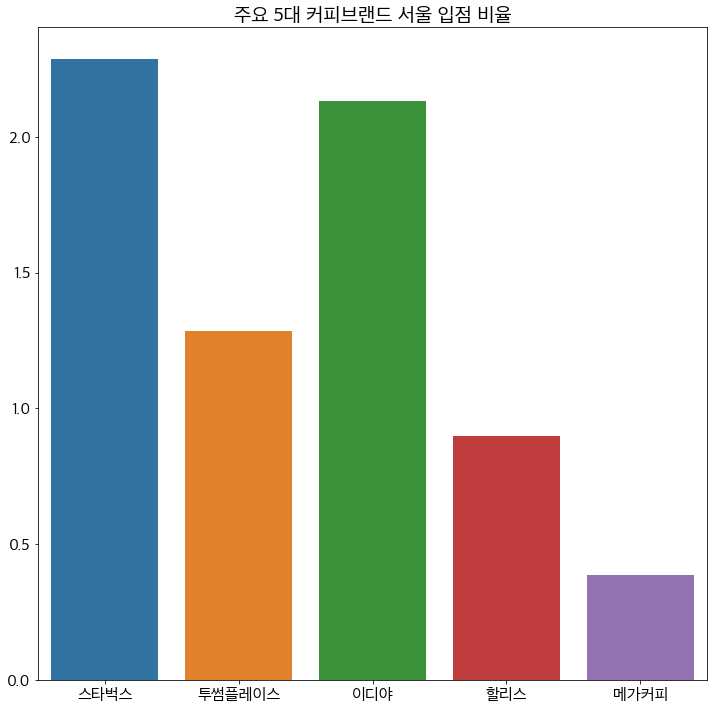

In [38]:
# 주요 5대 커피브랜드 서울 입점 비율을 시각화합니다.
starbucks_rate = (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100)
ediya_rate = (len(df_seoul_ediya) / len(df_seoul_coffee)* 100)
hollys_rate = (len(df_seoul_hollys) / len(df_seoul_coffee)* 100)
twosome_rate = (len(df_seoul_2some) / len(df_seoul_coffee)* 100)
mega_rate = (len(df_seoul_mega) / len(df_seoul_coffee)* 100)


# starbucks_rate = (len(df_seoul_starbucks) / len(df_starbucks) * 100)
# twosome_rate = (len(df_seoul_2some) / len(df_2some) * 100)
# ediya_rate = (len(df_seoul_ediya) / len(df_ediya) * 100)
# mega_rate = (len(df_seoul_mega) / len(df_mega) * 100)
# coffeebean_rate = (len(df_seoul_coffeebean) / len(df_coffeebean) * 100)

X = ["스타벅스", "투썸플레이스", "이디야", "할리스", "메가커피"]
y = [starbucks_rate, twosome_rate, ediya_rate, hollys_rate, mega_rate]

plt.figure(figsize=(12, 12))
plt.title("주요 5대 커피브랜드 서울 입점 비율", fontdict={"fontsize" : 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=X, y=y)
plt.savefig("coffee_barplot.png")
plt.show()

### (Challenge) More Prettier!

In [36]:
# 위의 barplot을 seaborn을 이용하여 더욱 멋지게 시각화해보세요!